In [4]:
pip install ucimlrepo

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

# metadata
print(ionosphere.metadata)

# variable information
print(ionosphere.variables)


{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
K = []
training = []
test = []
scores = {}

for k in range(2, 83):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

2 : [0.9877551020408163, 0.8962264150943396]
3 : [0.9183673469387755, 0.8584905660377359]
4 : [0.9346938775510204, 0.8773584905660378]
5 : [0.8571428571428571, 0.839622641509434]
6 : [0.8653061224489796, 0.8584905660377359]
7 : [0.8571428571428571, 0.8301886792452831]
8 : [0.8612244897959184, 0.8301886792452831]
9 : [0.8408163265306122, 0.8301886792452831]
10 : [0.8448979591836735, 0.839622641509434]
11 : [0.8285714285714286, 0.8301886792452831]
12 : [0.8408163265306122, 0.8301886792452831]
13 : [0.8326530612244898, 0.8301886792452831]
14 : [0.8367346938775511, 0.839622641509434]
15 : [0.8408163265306122, 0.8301886792452831]
16 : [0.8448979591836735, 0.839622641509434]
17 : [0.8408163265306122, 0.8113207547169812]
18 : [0.8408163265306122, 0.839622641509434]
19 : [0.8367346938775511, 0.8207547169811321]
20 : [0.8367346938775511, 0.8301886792452831]
21 : [0.8326530612244898, 0.8113207547169812]
22 : [0.8326530612244898, 0.8207547169811321]
23 : [0.8244897959183674, 0.8113207547169812]
2

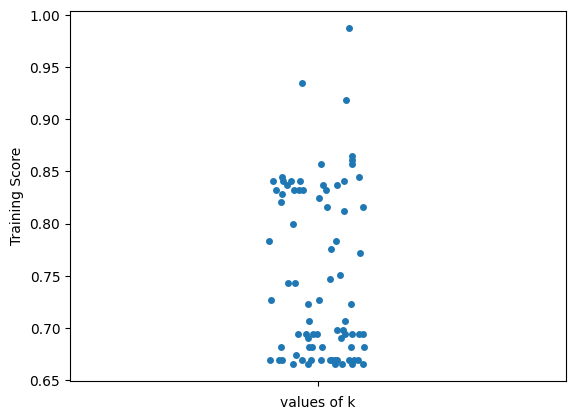

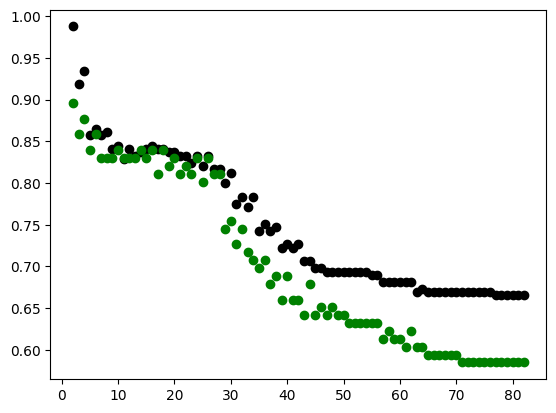

In [24]:
for keys, values in scores.items():
    print(keys, ':', values)
ax = sns.stripplot(training)
ax.set(xlabel ='values of k', ylabel ='Training Score')
plt.show()
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()